In [1]:
import numpy as np
import pandas as pd 
import fbprophet 
from fbprophet import Prophet
import plotly
import statsmodels
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot
import altair as alt
import scipy
from scipy import signal
import spectrum 
from spectrum import WelchPeriodogram
from spectrum import Periodogram
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import q_stat
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import sqrt
import warnings
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
flu_data = pd.read_csv('flu.csv', header = 2, sep = ',')

In [3]:
flu_data.head(10)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,United States of America,Region of the Americas of WHO,North America,2013,1,2012-12-31,2013-01-06,18219,18219,0.0,...,0.0,1653,5377,0,0,1097,1097,6474,NaN,Widespread Outbreak
1,United States of America,Region of the Americas of WHO,North America,2013,2,2013-01-07,2013-01-13,20013,20013,0.0,...,0.0,1767,5752,0,0,1145,1145,6897,NaN,Widespread Outbreak
2,United States of America,Region of the Americas of WHO,North America,2013,3,2013-01-14,2013-01-20,19228,19228,0.0,...,0.0,1624,4858,0,0,1078,1078,5936,NaN,Widespread Outbreak
3,United States of America,Region of the Americas of WHO,North America,2013,4,2013-01-21,2013-01-27,17139,17139,0.0,...,0.0,1528,4039,0,0,1091,1091,5130,NaN,Widespread Outbreak
4,United States of America,Region of the Americas of WHO,North America,2013,5,2013-01-28,2013-02-03,14795,14795,0.0,...,0.0,951,2963,0,0,1076,1076,4039,NaN,Widespread Outbreak
5,United States of America,Region of the Americas of WHO,North America,2013,6,2013-02-04,2013-02-10,13259,13259,0.0,...,0.0,706,2008,0,0,1051,1051,3059,NaN,Widespread Outbreak
6,United States of America,Region of the Americas of WHO,North America,2013,7,2013-02-11,2013-02-17,11468,11468,0.0,...,0.0,486,1353,0,0,1032,1032,2385,NaN,Widespread Outbreak
7,United States of America,Region of the Americas of WHO,North America,2013,8,2013-02-18,2013-02-24,10398,10398,0.0,...,0.0,363,985,0,0,1084,1084,2069,NaN,Widespread Outbreak
8,United States of America,Region of the Americas of WHO,North America,2013,9,2013-02-25,2013-03-03,9499,9499,0.0,...,0.0,289,730,0,0,1046,1046,1776,NaN,Widespread Outbreak
9,United States of America,Region of the Americas of WHO,North America,2013,10,2013-03-04,2013-03-10,8999,8999,0.0,...,0.0,200,562,0,0,1083,1083,1645,NaN,Regional Outbreak


In [4]:
#Percentage of positive results
flu_data["pct_positive"]=round((flu_data["ALL_INF"]/flu_data["SPEC_PROCESSED_NB"])*100,2)

In [5]:
flu_data.head(10)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE,pct_positive
0,United States of America,Region of the Americas of WHO,North America,2013,1,2012-12-31,2013-01-06,18219,18219,0.0,...,1653,5377,0,0,1097,1097,6474,NaN,Widespread Outbreak,35.53
1,United States of America,Region of the Americas of WHO,North America,2013,2,2013-01-07,2013-01-13,20013,20013,0.0,...,1767,5752,0,0,1145,1145,6897,NaN,Widespread Outbreak,34.46
2,United States of America,Region of the Americas of WHO,North America,2013,3,2013-01-14,2013-01-20,19228,19228,0.0,...,1624,4858,0,0,1078,1078,5936,NaN,Widespread Outbreak,30.87
3,United States of America,Region of the Americas of WHO,North America,2013,4,2013-01-21,2013-01-27,17139,17139,0.0,...,1528,4039,0,0,1091,1091,5130,NaN,Widespread Outbreak,29.93
4,United States of America,Region of the Americas of WHO,North America,2013,5,2013-01-28,2013-02-03,14795,14795,0.0,...,951,2963,0,0,1076,1076,4039,NaN,Widespread Outbreak,27.30
5,United States of America,Region of the Americas of WHO,North America,2013,6,2013-02-04,2013-02-10,13259,13259,0.0,...,706,2008,0,0,1051,1051,3059,NaN,Widespread Outbreak,23.07
6,United States of America,Region of the Americas of WHO,North America,2013,7,2013-02-11,2013-02-17,11468,11468,0.0,...,486,1353,0,0,1032,1032,2385,NaN,Widespread Outbreak,20.80
7,United States of America,Region of the Americas of WHO,North America,2013,8,2013-02-18,2013-02-24,10398,10398,0.0,...,363,985,0,0,1084,1084,2069,NaN,Widespread Outbreak,19.90
8,United States of America,Region of the Americas of WHO,North America,2013,9,2013-02-25,2013-03-03,9499,9499,0.0,...,289,730,0,0,1046,1046,1776,NaN,Widespread Outbreak,18.70
9,United States of America,Region of the Americas of WHO,North America,2013,10,2013-03-04,2013-03-10,8999,8999,0.0,...,200,562,0,0,1083,1083,1645,NaN,Regional Outbreak,18.28


## Utility Functions

In [6]:
def arima_window_ase(data_series, train_ratio = .60, order = (0,0,0)): 
    X_series = data_series.values
    size = int(len(X_series)*train_ratio)
    train,test = X_series[0:size], X_series[size:len(X_series)]
    history = [i for i in train]
    preds = list()
    for t in range(len(test)): 
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        fore_cast = model_fit.forecast()
        yhat = fore_cast[0]
        preds.append(yhat)
        obs = test[t]
        history.append(obs)
    rmse = sqrt(mean_squared_error(test, preds))
    pyplot.plot(test)
    pyplot.plot(preds, color='red')
    pyplot.show()
    
    return rmse
    print(residuals.describe())

In [7]:

def arima_seas_window_ase(data_series, train_ratio = .60, order = (0,0,0), seasonal_order = (0,0,0,0),simple_differencing=True): 
    X_series = data_series.values
    size = int(len(X_series)*train_ratio)
    train,test = X_series[0:size], X_series[size:len(X_series)]
    history = [i for i in train]
    preds = list()
    for t in range(len(test)): 
        model = ARIMA(history, order=order)
        model = sm.tsa.statespace.SARIMAX(history, order=order, seasonal_order=seasonal_order,simple_differencing=simple_differencing) 
        model_fit = model.fit()
        fore_cast = model_fit.forecast()
        yhat = fore_cast[0]
        preds.append(yhat)
        obs = test[t]
        history.append(obs)
    rmse = sqrt(mean_squared_error(test, preds))
    pyplot.plot(test)
    pyplot.plot(preds, color='red')
    pyplot.show()
    
    return rmse
    print(residuals.describe())

In [8]:

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [9]:
def make_realization(data_frame,x,y): 
    
    vis = alt.Chart(data_frame).mark_line().encode(
    x = x, 
    y = y
    )
    
    return vis

In [10]:
def make_autocorr(data_series, nlags=40, fft = False): 
    auto_corr = statsmodels.tsa.stattools.acf(data_series, nlags=nlags, fft=fft)
    data = pd.DataFrame(list(enumerate(auto_corr)), columns = ['Lag', 'AutoCor'])
    vis = alt.Chart(data).mark_bar().encode(
    x='Lag',
    y='AutoCor',
    )
    return vis

In [11]:
def make_sig_periodgram(data_series, fs = 1, scaling = 'density'): 
    f, Pxx_den = scipy.signal.periodogram(data_series, fs = fs, scaling=scaling)
    data = pd.DataFrame({'Freq' : f,'Density' : Pxx_den})
    vis = alt.Chart(data).mark_bar().encode(
        x='Freq',
        y='Density',
    )
    return vis

In [12]:
def make_welch_sig_periodgram(data_series, fs = 1, nperseg=50): 
    f, Pxx_den = scipy.signal.welch(flu_data.SPEC_RECEIVED_NB, fs = 1, nperseg=nperseg)
    data = pd.DataFrame({'Freq' : f,'Density' : Pxx_den})
    vis = alt.Chart(data).mark_bar().encode(
        x='Freq',
        y='Density',
    )
    return vis

In [13]:
def make_welch_periodgram(data_series, sampling = 50):
    psd = WelchPeriodogram(data_series, sampling)
    return psd[1]

In [14]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [15]:
def plot_predict(self, start=None, end=None, exog=None, dynamic=False,alpha=.05, plot_insample=True, ax=None):
    from statsmodels.graphics.utils import _import_mpl, create_mpl_ax
    _ = _import_mpl()
    fig, ax = create_mpl_ax(ax)

    # use predict so you set dates
    forecast = self.predict(start, end, exog, dynamic)
    # doing this twice. just add a plot keyword to predict?
    start, end, out_of_sample, _ = (
        self.model._get_prediction_index(start, end, dynamic=False))

    if out_of_sample:
        steps = out_of_sample
        fc_error = self._forecast_error(steps)
        conf_int = self._forecast_conf_int(forecast[-steps:], fc_error,
                                               alpha)

    if hasattr(self.data, "predict_dates"):
        from pandas import Series
        forecast = Series(forecast, index=self.data.predict_dates)
        ax = forecast.plot(ax=ax, label='forecast')
    else:
        ax.plot(forecast)

    x = ax.get_lines()[-1].get_xdata()
    if out_of_sample:
        label = "{0:.0%} confidence interval".format(1 - alpha)
        ax.fill_between(x[-out_of_sample:], conf_int[:, 0], conf_int[:, 1],
                        color='gray', alpha=.5, label=label)

    if plot_insample:
        ax.plot(x[:end + 1 - start], self.model.endog[start:end + 1], label=self.model.endog_names)

    ax.legend(loc='best')

    return fig

# Charts based on pct_positive
> pct_positive = (flu_data["ALL_INF"]/flu_data["SPEC_PROCESSED_NB"])*100

In [16]:
#Based on pct_positive
make_realization(flu_data, 'EDATE:T', 'pct_positive')


alt.Chart(...)

In [17]:
#pct_positive
alt.Chart(flu_data).mark_line().encode(
    x='EDATE:T',
    y='pct_positive'
)

alt.Chart(...)

In [18]:
#pct_positive
make_autocorr(flu_data.pct_positive, nlags = 400)

alt.Chart(...)

In [19]:
#pct_positive
make_sig_periodgram(flu_data.pct_positive)

alt.Chart(...)

In [20]:
f2, Pxx_den2 = scipy.signal.periodogram(flu_data.pct_positive, fs = 1, scaling='density')

In [21]:
data = pd.DataFrame({'Freq' : f2,'Density' : Pxx_den2})
alt.Chart(data).mark_bar().encode(
    x='Freq',
    y='Density',
)

alt.Chart(...)

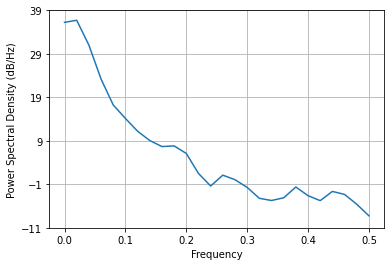

In [22]:
make_welch_periodgram(flu_data.pct_positive,sampling = 50)

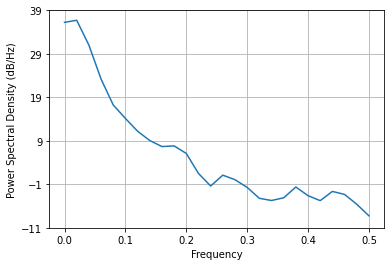

In [23]:
psd = WelchPeriodogram(flu_data.pct_positive,50)

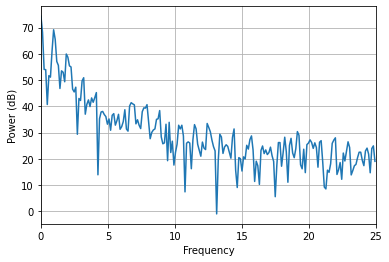

In [24]:
psd = Periodogram(flu_data.pct_positive, 50, scale_by_freq = True)
psd.plot()

In [25]:
dif_52 = statsmodels.tsa.statespace.tools.diff(flu_data.pct_positive,k_diff=0, k_seasonal_diff=52, seasonal_periods=1 )
dif_52

52    -1.297876e+14
53     4.927901e+13
54     6.855134e+13
55    -2.146537e+14
56     3.732774e+14
           ...     
418   -4.375131e+13
419    4.373794e+13
420   -3.688791e+13
421    2.428774e+13
422   -7.724018e+12
Name: pct_positive, Length: 371, dtype: float64

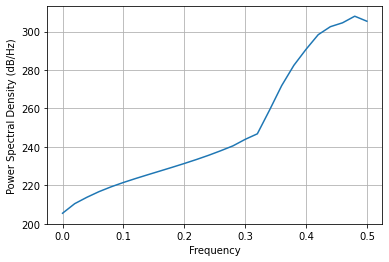

In [26]:

make_welch_periodgram(dif_52.values,sampling = 50)

In [27]:
#Auto Correlation Plot
make_autocorr(dif_52.values, nlags = 40)

alt.Chart(...)


# Tests and model start here

In [28]:
series = pd.Series(flu_data.pct_positive.values, index = flu_data.EDATE.astype('datetime64[ns]'), name = "Seasonal_Series")
series.describe()

count    423.000000
mean       9.364681
std        9.520811
min        0.050000
25%        2.325000
50%        4.440000
75%       15.035000
max       35.530000
Name: Seasonal_Series, dtype: float64

In [29]:
series = pd.Series(flu_data.pct_positive.values, index = flu_data.EDATE.astype('datetime64[ns]'), name = "Seasonal_Series")
series.describe()

count    423.000000
mean       9.364681
std        9.520811
min        0.050000
25%        2.325000
50%        4.440000
75%       15.035000
max       35.530000
Name: Seasonal_Series, dtype: float64

In [30]:
stl = STL(dif_52, seasonal=53)
res = stl.fit()
fig = res.plot()

ValueError: Unable to determine period from endog

In [31]:
#Auto Correlation Plot
make_autocorr(dif_52, nlags = 500)

alt.Chart(...)

In [32]:
#Dickey-Fuller Test

adf_test(dif_52)

Results of Dickey-Fuller Test:
Test Statistic                 -47.495134
p-value                          0.000000
#Lags Used                      16.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


Dickey-Fuller Test
#### Caution: tends to reject more often than not, creating a Type 1 error. Incorrectly rejecting H0.

H0: The series has a unit root.

Ha: The series has no unit root

Results: Reject H0 -- Series has no unit root

In [33]:
#KPSS Test
kpss_test(dif_52)

Results of KPSS Test:
Test Statistic            0.029406
p-value                   0.100000
Lags Used                21.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning



KPSS test

H0: The process is trend stationary.
Ha: The series has a unit root (series is not stationary).

Results:  Fail to reject H0 (p > 0.05) -- Trend is stationary

In [34]:
#Order determination assuming seasonality
res = statsmodels.tsa.stattools.arma_order_select_ic(dif_52, max_ar=10, max_ma=6, ic=["aic", "bic"], trend="nc")

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  retu

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace frame

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  w

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ign

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sean

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ign

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ign

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sean

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ign

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ign

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sean

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sean

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\tsatools.py:684: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs = 

In [35]:
res.aic

,0,1,2,3,4,5,6
0,NaN,25685.495636,25188.520429,24696.094369,24210.281836,23724.364463,23323.741723
1,25047.632286,24554.915081,24067.204939,23591.339108,23113.463006,22671.943314,22174.924535
2,24122.248217,26974.611678,24580.523661,23577.376443,23672.512290,21811.703333,22447.951816
3,23644.121657,23060.588746,23636.451411,23155.402015,22717.061665,21911.722930,22005.650845
4,23778.377198,23264.967810,24395.349536,23437.023376,22928.027950,22001.383540,22027.756612
5,23089.385867,23216.862375,22363.208550,22838.845948,22423.804616,22973.996224,22615.408486
6,22663.551844,22071.443425,22240.726003,22562.599442,22552.981963,22133.459511,22868.834796
7,23856.355188,23019.086603,22626.602153,22473.811723,22511.835234,22007.659407,21736.368773
8,25352.011750,23638.663803,21997.886577,23222.117816,22715.762263,22508.190221,22471.803111
9,25464.533137,23675.020700,22908.250265,23412.804362,22547.032300,22418.410798,22950.210790


In [36]:
res.aic_min_order

(7, 6)

In [37]:
res.bic

,0,1,2,3,4,5,6
0,NaN,25693.328040,25200.269035,24711.759178,24229.862846,23747.861676,23351.155138
1,25055.464690,24566.663687,24082.869747,23610.920118,23136.960218,22699.356729,22206.254152
2,24133.996824,26990.276487,24600.104671,23600.873655,23699.925704,21843.032949,22483.197634
3,23659.786465,23080.169756,23659.948624,23182.815430,22748.391282,21946.968749,22044.812866
4,23797.958208,23288.465022,24422.762950,23468.352993,22963.273769,22040.545561,22070.834834
5,23112.883080,23244.275789,22394.538167,22874.091767,22462.966637,23017.074447,22662.402911
6,22690.965258,22102.773042,22275.971822,22601.761463,22596.060186,22180.453936,22919.745422
7,23887.684804,23054.332422,22665.764174,22516.889945,22558.829659,22058.570034,21791.195602
8,25387.257569,23677.825823,22040.964800,23269.112241,22766.672890,22563.017050,22530.546142
9,25503.695158,23718.098923,22955.244690,23463.714989,22601.859129,22477.153829,23012.870023


In [38]:
res.bic_min_order

(7, 6)

In [39]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html?highlight=arima#statsmodels.tsa.arima.model.ARIMA
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#Original was 5,1,0

model = ARIMA(flu_data.pct_positive.values, order=(7,0,6), seasonal_order = (1, 0, 1, 52))
model_fit = model.fit()

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  423
Model:             ARIMA(7, 0, 6)x(1, 0, [1], 52)   Log Likelihood                -702.678
Date:                            Tue, 23 Feb 2021   AIC                           1439.356
Time:                                    21:51:27   BIC                           1508.161
Sample:                                         0   HQIC                          1466.543
                                            - 423                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3010      1.876      4.958      0.000       5.624      12.978
ar.L1          2.0158      0.296      6.811      0.000       1.436       2.596
ar.L2         -0.2755      0.428     -0.643      0.520      -1.115       0.564
ar.L3         -2.2911      0.196    -11.684      0.000      -2.675      -1.907
ar.L4          1.4884      0.574      2.593      0.010       0.363       2.614
ar.L5          1.2016      0.173      6.957      0.000       0.863       1.540
ar.L6         -1.6308      0.385     -4.236      0.000      -2.385      -0.876
ar.L7          0.4706      0.231      2.035      0.042       0.017       0.924
ma.L1         -0.4497      0.295     -1.525      0.127      -1.028       0.128
ma.L2         -1.0185      0.090    -11.348      0.000      -1.194      -0.843
ma.L3          0.9833      0.248      3.966      0.000       0.497       1.469
ma.L4          0.6086      0.199      3.065      0.002       0.219       0.998
ma.L5         -0.7739      0.240     -3.227      0.001      -1.244      -0.304
ma.L6          0.0007      0.096      0.007      0.994      -0.187       0.189
ar.S.L52       0.6448      0.146      4.413      0.000       0.358       0.931
ma.S.L52      -0.4213      0.178     -2.370      0.018      -0.770      -0.073
sigma2         1.5685      0.077     20.435      0.000       1.418       1.719
===================================================================================
Ljung-Box (L1) (Q):                   1.42   Jarque-Bera (JB):               344.35
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.02
Prob(H) (two-sided):                  0.21   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

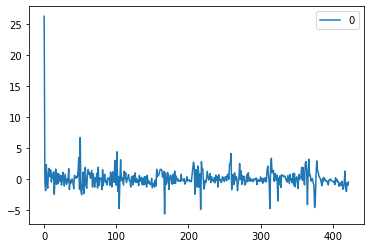

In [41]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

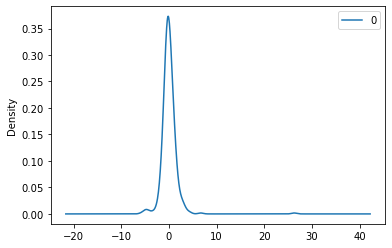

In [42]:
residuals.plot(kind='kde')
pyplot.show()

In [43]:
residuals.describe()

,0
count,423.000000
mean,0.028838
std,1.791990
min,-5.681551
25%,-0.641629
50%,-0.118033
75%,0.578079
max,26.229049


In [44]:
for i in range(24,51):
    print(sm.stats.acorr_ljungbox(model_fit.resid, lags=[i], return_df=True))

     lb_stat  lb_pvalue
24  7.459195   0.999496
     lb_stat  lb_pvalue
25  7.465651   0.999729
     lb_stat  lb_pvalue
26  7.467615   0.999858
     lb_stat  lb_pvalue
27  7.930779   0.999866
     lb_stat  lb_pvalue
28  8.129893    0.99991
    lb_stat  lb_pvalue
29  8.19915   0.999949
     lb_stat  lb_pvalue
30  8.406996   0.999965
     lb_stat  lb_pvalue
31  8.773425   0.999971
     lb_stat  lb_pvalue
32  8.823559   0.999984
     lb_stat  lb_pvalue
33  8.912548   0.999991
     lb_stat  lb_pvalue
34  9.247614   0.999993
    lb_stat  lb_pvalue
35  9.51945   0.999994
     lb_stat  lb_pvalue
36  9.635349   0.999997
     lb_stat  lb_pvalue
37  9.818269   0.999998
     lb_stat  lb_pvalue
38  9.833074   0.999999
      lb_stat  lb_pvalue
39  10.082644   0.999999
      lb_stat  lb_pvalue
40  10.887463   0.999999
      lb_stat  lb_pvalue
41  12.082507   0.999997
      lb_stat  lb_pvalue
42  12.098061   0.999998
      lb_stat  lb_pvalue
43  12.276818   0.999999
      lb_stat  lb_pvalue
44  12.55

#### No serial correlation

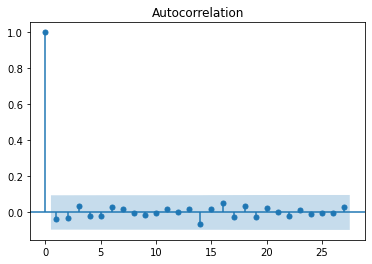

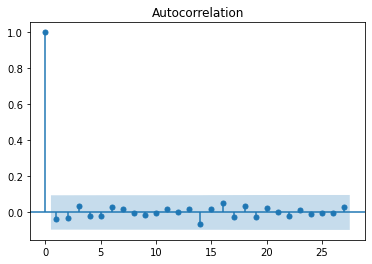

In [45]:
sm.graphics.tsa.plot_acf(residuals.values)

In [46]:
#Prediction
X = flu_data.pct_positive.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [48]:
for t in range(len(test)):
    model = ARIMA(history, order=(7,0,6), seasonal_order = (1, 0, 1, 52))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.919740, expected=2.930000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-1.966399, expected=3.310000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=2.562170, expected=2.620000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.205731, expected=3.080000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=2.501771, expected=3.070000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=2.931606, expected=3.020000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.481846, expected=2.660000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=2.752709, expected=3.090000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.096659, expected=3.270000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.090666, expected=4.130000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4.991836, expected=3.880000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.871060, expected=3.400000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.573839, expected=3.540000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4.045717, expected=3.460000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.548430, expected=2.050000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.032210, expected=2.260000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=2.805243, expected=2.440000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=2.937833, expected=3.270000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4.024752, expected=4.210000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4.747882, expected=7.080000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=8.873240, expected=8.640000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=9.916744, expected=11.700000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=13.450961, expected=13.420000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=14.336760, expected=14.240000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=14.586947, expected=18.850000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=21.059925, expected=25.130000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=28.171026, expected=29.700000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=31.396967, expected=26.220000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=24.523262, expected=25.880000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=25.028295, expected=29.070000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=29.895314, expected=30.970000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=31.567936, expected=32.760000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=33.103357, expected=32.780000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=31.768114, expected=32.080000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=31.197013, expected=30.420000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=28.718018, expected=27.790000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=25.143969, expected=24.390000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=21.940669, expected=17.060000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=12.277943, expected=8.040000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.843482, expected=2.580000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-2.963406, expected=1.150000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.012206, expected=0.760000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.042374, expected=0.740000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.086113, expected=0.430000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.015058, expected=0.490000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.700713, expected=0.610000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.562551, expected=0.600000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.494128, expected=0.210000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.583640, expected=0.210000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.542321, expected=0.350000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.177512, expected=0.360000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.303009, expected=0.350000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.137388, expected=0.320000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.364065, expected=0.220000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.092958, expected=0.200000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.154753, expected=0.360000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.572670, expected=0.180000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.069247, expected=0.130000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.594397, expected=0.170000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.334100, expected=0.150000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.495380, expected=0.220000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.880684, expected=0.230000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.912636, expected=0.160000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.059573, expected=0.210000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.226115, expected=0.440000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.189625, expected=0.240000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.304985, expected=0.190000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.996537, expected=0.270000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.151164, expected=0.240000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.413854, expected=0.180000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.188026, expected=0.170000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.382500, expected=0.120000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.700063, expected=0.150000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.375240, expected=0.170000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.154615, expected=0.140000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.202936, expected=0.180000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.964247, expected=0.200000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.596263, expected=0.220000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.992962, expected=0.210000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.271679, expected=0.220000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.483008, expected=0.220000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.710283, expected=0.120000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.808768, expected=0.170000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.991180, expected=0.140000


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.525951, expected=0.050000


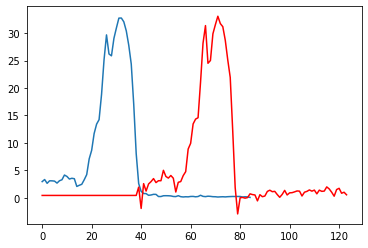

In [49]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [50]:
#RMSE
arima_seas_window_ase(flu_data.pct_positive, train_ratio = .80,  order=(7,0,6), seasonal_order = (1, 0, 1, 52))

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\seans\Anaconda3\

KeyboardInterrupt: 

In [ ]:

#Create Training and Test
train = flu_data.pct_positive[:338]
test = flu_data.pct_positive[338:422]

#Model fit and forecast
model = ARIMA(flu_data.pct_positive[:338], order=(7,0,6), seasonal_order = (1, 0, 1, 52))
model_fit = model.fit()
forecast = model_fit.predict(start = 338, end = 422, dynamic=False)
forecast_series = pd.Series(forecast)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#bForecast with 
model = ARIMA(flu_data.pct_positive.values, order=(7,0,6), seasonal_order = (1, 0, 1, 52))
fitted = model.fit()
print(fitted.summary())

#Forecast
fc, se, conf = fitted.forecast(25, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
model_fit.predict(422,440)

In [ ]:
flu_data.EDATE[422]

In [ ]:
len(flu_data.pct_positive)

In [ ]:
statsmodels.__version__